In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition

from luwiji.time_series import illustration

# Christmas Search Interest

Jadi dataset yang digunakan ini merupakan data `christmas` yang berasal dari `google search.` Jadi di google itu ada yang namanya google trends yang mana dia akan merecap keyword2 tertentu.

Dalam hal ini kita mau melihat trend untuk keyword `Christmas` di google.

google trends: https://trends.google.co.id/trends/explore?date=all&geo=ID&q=Christmas

In [2]:
df = pd.read_csv('data/christmas.csv', index_col = 'date', parse_dates=['date'])

In [3]:
df.head()

,interest
date,
2004-01-01,5
2004-02-01,2
2004-03-01,2
2004-04-01,2
2004-05-01,2


In [4]:
df.tail()

,interest
date,
2018-07-01,3
2018-08-01,4
2018-09-01,6
2018-10-01,11
2018-11-01,27


`Jadi dalam hal ini kita mau melakukan forecasting/prediksi keyword 'Christmas' ini untuk setiap bulannya terhadap beberapa tahun kedepan berdasarkan data christmas dari tahun 2004 sampe 2018`

# Splitting dataset

In [5]:
series = df.interest
X_train, X_test = series[:-30], series[-30:]

<AxesSubplot:xlabel='date'>

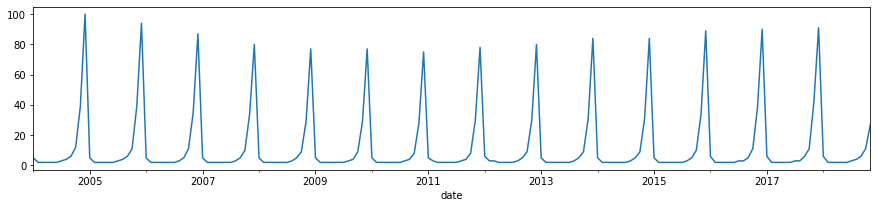

In [6]:
#VISUALISASI
series.plot(figsize=(15,3))

`Berdasarkan visualisasi di atas, ternyata hasilnya fluktuasi grafiknya memiliki 2 kemungkinan:`
1. Tidak terdapat trend sama sekali karena hanya sedikit kecenderungan naik/turunnya
2. Terdapat trend yang sedikit mengalami perubahan naik/turunnya pada grafik

# Training without trend

In [7]:
es = ExponentialSmoothing (X_train, seasonal='add', seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True)

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


# Forecasting

Dalam hal ini saya ingin melakukan prediksi/forecasting terhadap keyword 'Christmas' untuk 50 bulan kedepan berdasarkan data dari 2004 sampai 2020.

In [8]:
pred = model.predict(len(X_train)-15, len(X_train)+50)

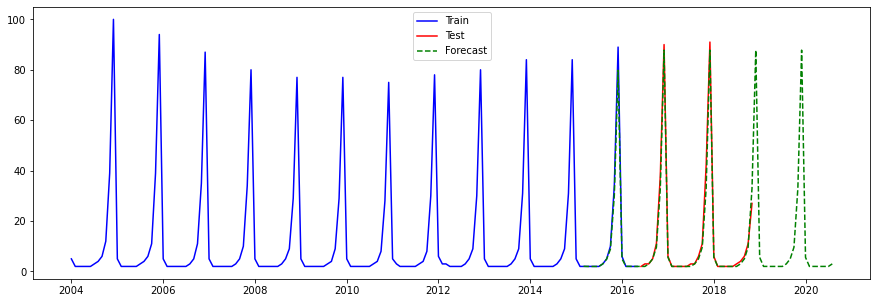

In [9]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label = 'Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()

`Berdasarkan hasil visualisasi di atas, ternyata model salah memprediksi dari data testnya yang mana hasilnya itu melebih dari data test pada tahun 2017 dan 2018.`

_____

# Training with trend

In [10]:
es = ExponentialSmoothing (X_train, trend = 'add', damped_trend=True, seasonal='add', seasonal_periods=12)
model2 = es.fit(optimized=True, use_boxcox=True)

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


# Forecasting 

In [11]:
pred2 = model2.predict(len(X_train)-15, len(X_train)+50)

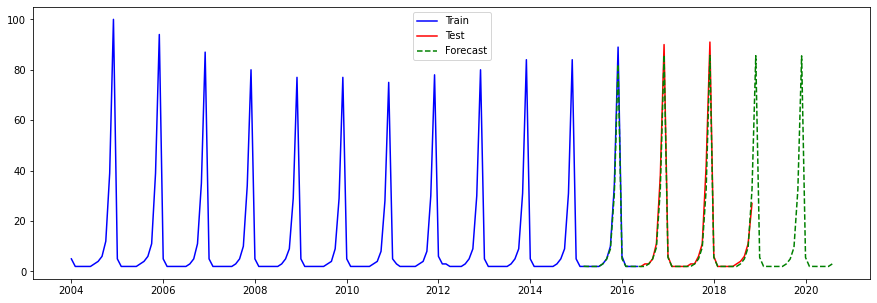

In [12]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label = 'Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred2, 'g--', label='Forecast')
plt.legend()

`Berdasarkan hasil visualisasi di atas, ternyata ketika kita menambahkan trendnya berdasarkan visualisasi di awal, maka hasilnya lebih baik dibandingkan saat mengaggap data itu tidak memiliki trend. Hal ini berarti sebenarnya terdapat trend yang ada di keyword 'Christmas'`

## Comparing with reality from Google Trends
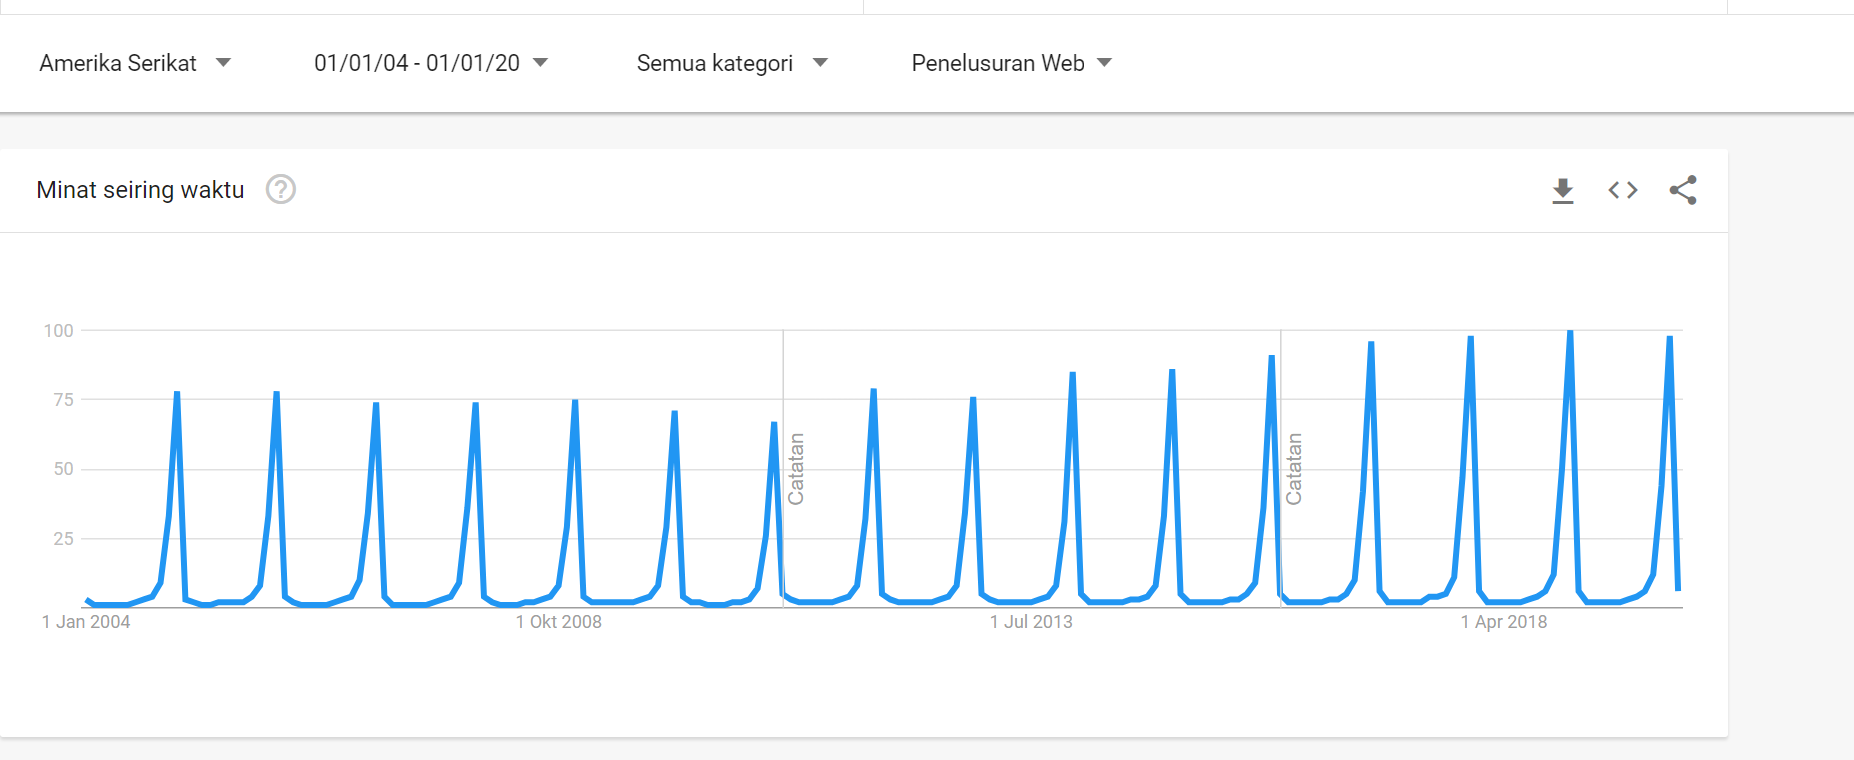

`Jika dibandingkan dengan data asli dari Google Trends, ternyata lebih make sense ketika kita menambahkan trend di dalam modelnya.`